# Real Time Road Detection

- https://www.youtube.com/watch?v=BgA9asLpkJU&t=49s

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Load the video
src = cv2.VideoCapture('/Users/jane/Desktop/dev/OpenCV/data/drive_cam.mp4')

## 1 Image load from Video

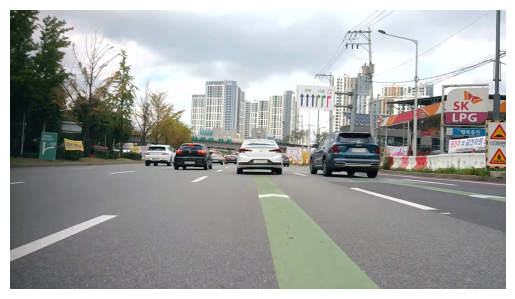

In [9]:
frame_number = 100

# Set the video position to the specified frame number
src.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the frame
ret, frame = src.read()

if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Display the image in the Jupyter Notebook
    plt.imshow(frame_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print(f"Could not extract frame {frame_number}")

src.release()

## 2 Preprocessing the image

convert the image to the grayscale andn run Gaussian filter to remove small edges

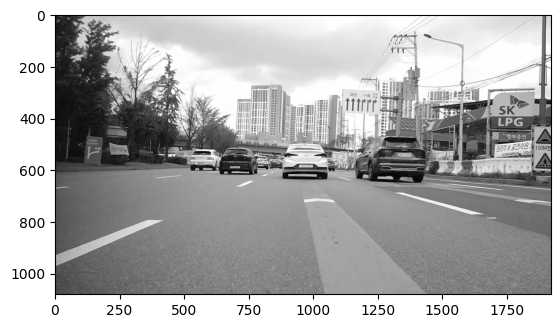

In [33]:
gray = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(gray, cv2.COLOR_RGB2GRAY)
#gray = cv2.GaussianBlur(gray, (11,11), 0)
plt.imshow(gray, cmap='gray')

## 3 Canny Edge Detection

create edges

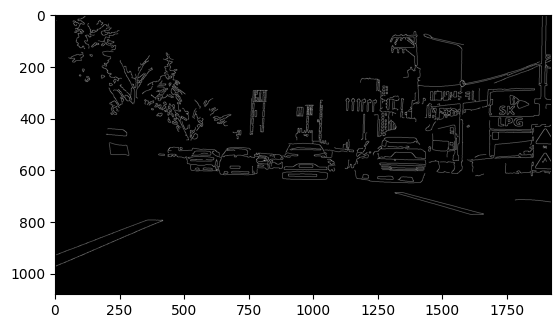

In [38]:
edges = cv2.Canny(gray, 50, 200)
plt.imshow(edges, cmap='gray')

## 4 Apply HoughLines

1. edges: Output of edge detector
2. lines: A vector to store the coordinates of the start and end of the lines
3. rho: The resolution parameter rho in pixels
4. thetha: The resolution of the parameter theta in radians
5. threshold: The minimum number of intersecting points to detct a line

- thetas and rhos
- distance of and edge point < maxLineGap -> assumed that edge lies on that line
- lines which has edge pixels > minLineLength -> identified and saved

4 971 9 969
1475 735 1515 746
298 846 310 841
966 600 1050 600
196 890 209 884
169 901 191 892
247 835 258 831
154 871 196 855
236 872 248 867
1877 318 1877 276
403 544 408 544
1396 578 1404 578
320 836 334 830
1260 574 1280 574
1367 695 1376 697
1516 747 1528 750
1897 43 1897 6
134 916 158 906
1746 450 1838 451
1775 220 1786 217
1501 570 1509 570
1415 708 1428 711
206 851 212 849
1510 351 1515 351
1763 223 1772 221
1278 559 1298 559
1740 445 1774 445
1694 455 1706 455
23 921 44 913
1429 711 1436 713
1357 584 1384 584
1750 296 1769 296
598 522 610 522
1365 577 1388 577
229 378 235 380
1546 347 1552 347
250 866 269 858
1588 768 1593 769
299 816 306 813
945 523 973 523
1370 368 1377 368
1302 592 1322 592
1301 598 1314 598
1454 729 1463 731
1314 560 1325 560
409 545 422 545
1264 337 1274 335
1450 717 1467 721
1795 493 1802 493
1502 352 1508 352
214 848 225 844
730 521 740 524
1584 268 1602 265
577 550 591 550
686 606 697 606
1735 296 1749 296
1790 457 1837 457
879 547 886 547
1787 394 180

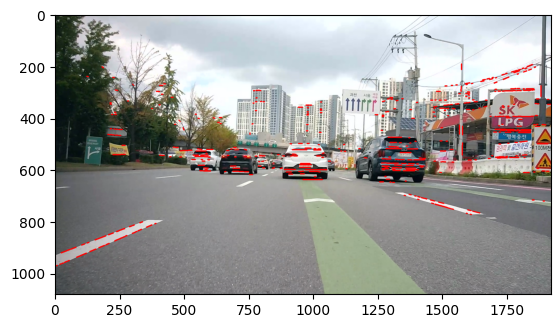

In [51]:
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=5)

for line in lines:
    x1, y1, x2, y2 = line[0]
    print(x1, y1, x2, y2)

    if (y1 > 1700 or y2>1500):
        cv2.line(frame_rgb, (x1,y1), (x2,y2), (255,0,0), 3)

plt.imshow(frame_rgb)